In [47]:
import pandas as pd
import numpy as np

In [48]:
fips = '36061'

In [49]:
# Cleaning and retrieving mobility data

mob = pd.read_csv('applemobilitydata/applemobilitycleaned_county.csv')
mob = mob.loc[mob['fips'] == float(fips)]
cols = [0,2,3]
mob = mob.drop(mob.columns[cols], axis=1)

In [50]:
# Cleaning and retrieving symptoms data

sym = pd.read_csv('covidsymptoms/covidsymptoms_google.csv')
sym = sym.loc[sym['fips'] == float(fips)]
cols = [0,2,3]
sym = sym.drop(sym.columns[cols], axis=1)

In [51]:
# Cleaning and retrieving demographics data

dem = pd.read_csv('countydemographics/county_demographics.csv')
dem = dem.loc[dem['fips'] == float(fips)]
cols = [0,2,3,4,5,6,9,10,11]
dem = dem.drop(dem.columns[cols], axis=1)

In [52]:
# Cleaning and retrieving testing rate data

tes = pd.read_csv('testingrates/testing_rates_county.csv')
tes = tes.loc[tes['fips'] == float(fips)]
cols = [0]
tes = tes.drop(tes.columns[cols], axis=1)

In [53]:
# Cleaning and retrieving case data

cas = pd.read_csv('covidstats/confirmed_cases_county.csv')
cas = cas.loc[cas['fips'] == float(fips)]
cols = [0]
cas = cas.drop(cas.columns[cols], axis=1)

In [54]:
newX = pd.concat([mob,sym])
newX = newX.reset_index()
newX = newX.drop(newX.columns[[0,1]], axis=1)

newY = pd.concat([cas])
newY = newY.reset_index()
newY = newY.drop(newY.columns[[0,1]], axis=1)

In [55]:
newX = newX.T
newY = newY.T
newX = newX.fillna(0)
newY = newY.fillna(0)

In [56]:
X = newX[[0,1]]
y = newY[[0]]

In [57]:
# Moving averages

X[0] = X[0].rolling(window=4).mean().dropna()
X[1] = X[1].rolling(window=2).mean().dropna()

X[0] = X[0].shift(6).dropna()
X[1] = X[1].shift(4).dropna()

#X = X[X.index.isin(y.index)]
#y = y[y.index.isin(X.index)]
#y = X.fillna(0)
#y = y.fillna(0)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y)
y = np.reshape(y, (y.shape[0],))

In [13]:
# Gaussian Process Regression

In [ ]:
import sklearn.gaussian_process as gp
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
regressor = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
model = regressor.fit(X, y)

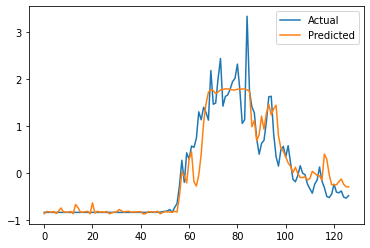

In [15]:
y_pred = regressor.predict(X)
df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
df.plot()

In [58]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(X)

                   0          1
2020-01-13       NaN        NaN
2020-01-14       NaN        NaN
2020-01-15       NaN        NaN
2020-01-16       NaN        NaN
2020-01-17       NaN        NaN
2020-01-18       NaN   0.000000
2020-01-19       NaN   0.000000
2020-01-20       NaN   0.000000
2020-01-21       NaN   0.000000
2020-01-22   99.3600   0.000000
2020-01-23  105.1000   0.000000
2020-01-24  110.1675   0.000000
2020-01-25  112.3550   0.000000
2020-01-26  108.4500   0.000000
2020-01-27  100.3700   0.000000
2020-01-28   95.4450   0.000000
2020-01-29   94.1250   0.000000
2020-01-30  103.4750   0.000000
2020-01-31  111.5100   0.000000
2020-02-01  112.2175   0.000000
2020-02-02  108.4675   0.000000
2020-02-03   99.9375   0.000000
2020-02-04   93.0250   0.000000
2020-02-05   94.0150   0.000000
2020-02-06  103.2850   0.000000
2020-02-07  111.8200   0.000000
2020-02-08  109.9475   0.000000
2020-02-09  107.2725   0.000000
2020-02-10   99.6175   0.000000
2020-02-11   92.5750   0.000000
2020-02-

In [59]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(y)

                 0
2020-01-22     0.0
2020-01-23     0.0
2020-01-24     0.0
2020-01-25     0.0
2020-01-26     0.0
2020-01-27     0.0
2020-01-28     0.0
2020-01-29     0.0
2020-01-30     0.0
2020-01-31     0.0
2020-02-01     0.0
2020-02-02     0.0
2020-02-03     0.0
2020-02-04     0.0
2020-02-05     0.0
2020-02-06     0.0
2020-02-07     0.0
2020-02-08     0.0
2020-02-09     0.0
2020-02-10     0.0
2020-02-11     0.0
2020-02-12     0.0
2020-02-13     0.0
2020-02-14     0.0
2020-02-15     0.0
2020-02-16     0.0
2020-02-17     0.0
2020-02-18     0.0
2020-02-19     0.0
2020-02-20     0.0
2020-02-21     0.0
2020-02-22     0.0
2020-02-23     0.0
2020-02-24     0.0
2020-02-25     0.0
2020-02-26     0.0
2020-02-27     0.0
2020-02-28     0.0
2020-02-29     0.0
2020-03-01     0.0
2020-03-02     1.0
2020-03-03     0.0
2020-03-04     0.0
2020-03-05     3.0
2020-03-06     7.0
2020-03-07     0.0
2020-03-08     1.0
2020-03-09     7.0
2020-03-10     6.0
2020-03-11    30.0
2020-03-12    40.0
2020-03-13  